# **Project Name - Yes Bank**

##### **Project Type - Regression**
##### **Contribution - Individual**
##### **Name - Shivan Mishra**

# **Project Summary :--**
*In this project, we aim to predict the monthly closing stock price of Yes Bank using regression models based on historical stock data. The dataset contains monthly values including the opening, highest, lowest, and closing prices of the stock.*

*To perform this task, we implemented and compared three different regression models:*

    *1. Multiple Linear Regression*

    *2. SVR (Support Vector Regressor)*
    
    *3. K-Nearest Neighbors (KNN) Regressor*
    
*We applied both normalization and standardization techniques during the preprocessing phase to ensure optimal model performance. Data was split into training and testing sets using train_test_split.*

### *Library's are:--*

***1. Numpy***

***2. Pandas***

***3. Matplotlib***

***4. Seaborn***

***5. Sklearn***

#### *Evaluation Metrics Used:- Mean Absolute Error and R2*


# **GitHub Link -** <a href="https://github.com/shivan632/Labmentix-1.git"> https://github.com/shivan632/Labmentix-1.git</a>

# **Problem Statement :--**

**The main objective is to predict the Stock's Closing price of the Month.**

****

# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns       
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2


### **Loading Dataset**

In [40]:
# Step 1: Load the dataset
df = pd.read_csv("data_YesBank_StockPrices.csv")

### **Dataset First View**

In [41]:
df.head(6)  # Display the first few rows of the dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71


### **Dataset Rows & Columns count**

In [42]:
#Dataset Rows & Columns count
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("Column Names:", df.columns.tolist())

Number of Rows: 185
Number of Columns: 5
Column Names: ['Date', 'Open', 'High', 'Low', 'Close']


### **Dataset Information**

In [43]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### **Checking Duplicate Values / Missing/Null Values**

In [44]:
#Step 2: Checking duplicates and null values
duplicates = df.duplicated().sum()      # Check for duplicate rows  
print(f"Number of duplicate rows: {duplicates}")
null_counts = df.isnull().sum()     # Count null values in each column
print(f"Null values in each column:\n{null_counts}")

Number of duplicate rows: 0
Null values in each column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


### **What did you know about your dataset?**

📊 Lets Explore What Did We Learn About the Dataset?

The dataset contains historical stock prices of Yes Bank, with 185 rows and 5 columns.

Each row represents stock data for a specific date, and the columns include:

- **Date:** The date of the record (object type; can be converted to datetime)

- **Open:** Stock price at market open

- **High:** Highest price of the day
 
- **Low:** Lowest price of the day
 
- **Close:** Stock price at market close

✅ All columns have complete data — no missing or null values were found.

✅ There are no duplicate rows, indicating the dataset is clean.

🧮 The numeric columns (Open, High, Low, Close) are of type float64, suitable for further statistical analysis and modeling.

****

## ***2. Understanding Your Variables***

In [45]:
# Dataset Columns
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close']

In [46]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### **Variables Description**

Below is a brief description of each variable in the dataset:

- **Date**: The trading date for each record. While it is not used directly in prediction models, it is important for time-based analysis, trend visualization, and for creating additional time-related features (e.g., day of the week, month).
  
- **Open**: The price at which Yes Bank's stock opened for trading on a given day.

- **High**: The highest price reached by the stock during the trading day.

- **Low**: The lowest price reached by the stock during the trading day.

- **Close**: The final price of the stock at market close. This is often used as the **target variable** for stock price prediction tasks.

> All price-related columns (`Open`, `High`, `Low`, `Close`) are continuous numerical variables and are essential for trend and pattern analysis.


### **Check Unique Values for each variable.**

In [47]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

****

## ***3. Data Wrangling***

### **Data Wrangling Code**

In [48]:

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

df = df.drop_duplicates()

print("Missing values:\n", df.isna().sum())

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

print("\nData types after conversion:\n", df.dtypes)

df = df.reset_index(drop=True)
df.head()


Missing values:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Data types after conversion:
 Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
Month             int32
Year              int32
dtype: object


,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


### **Insights Gained and Manipulations Performed**

#### ✅ Data Manipulations Performed:
- Converted the **`Date`** column from a string like `'Jul-05'` to proper `datetime` format using `%b-%y`
- Created new **`Month`** and **`Year`** columns from the `Date` column for better time-based analysis
- Checked for and confirmed that there are **no missing values** or **null entries**
- Removed any **duplicate rows** (none were found in this case)
- Verified data types to ensure all price-related columns (`Open`, `High`, `Low`, `Close`) are in **float64** format
- Reset the dataframe index after cleaning

#### 📌 Key Insights Observed:
- The dataset contains **monthly stock prices** for Yes Bank
- Data ranges from **July 2005 onward**, with each row representing a **monthly summary**
- All price features (`Open`, `High`, `Low`, `Close`) appear to be **continuous numerical variables**
- No immediate data quality issues like missing or duplicated values were found

This clean dataset is now ready for visualization (EDA) and modeling steps.


****

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***U — Univariate Analysis:--***

### *1. Histogram of Closing Prices*

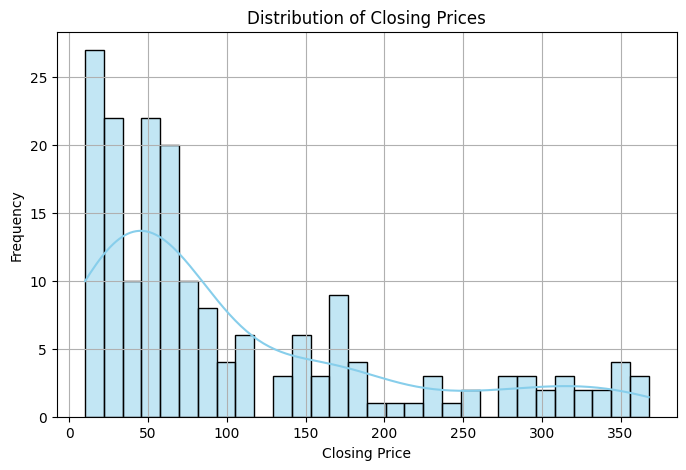

In [49]:
# Chart visualization code
plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Why this chart?
To understand how the closing prices are distributed — skewed, normal, etc.

Insights:
If prices are clustered around a range or show outliers, we can identify volatility or stability.

Business Impact:
Understanding distribution helps in risk assessment. Skewed data may imply a need for transformation or highlight price manipulation.






































### *2. Line Plot of Closing Price Over Time*

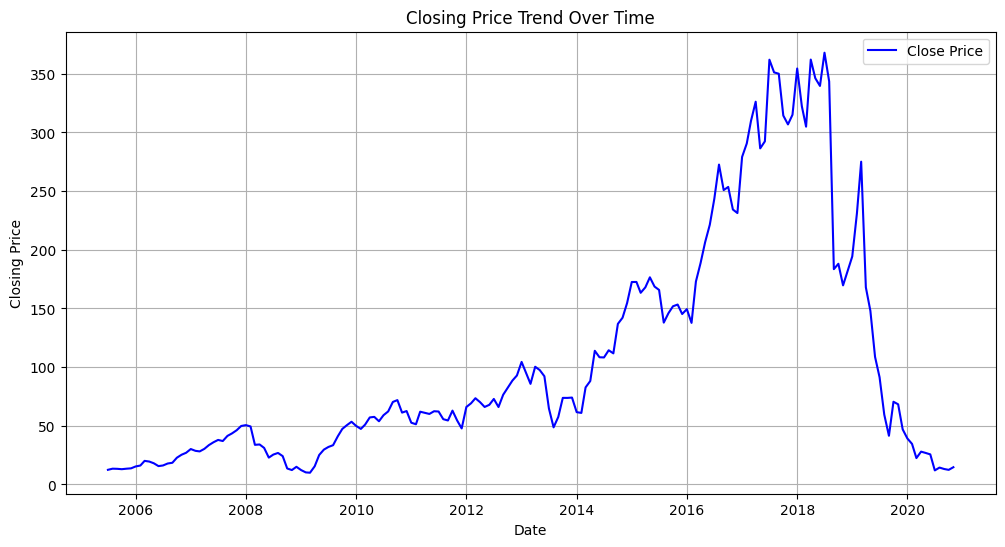

In [50]:
# Chart visualization code
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()


Why this chart?
To observe trends, spikes, crashes, or steady movement in closing prices.

Insights:
Sharp drops or increases can indicate major events (like the Rana Kapoor fraud case).

Business Impact:
Helps correlate financial events with stock performance for strategic planning.



## ***B — Bivariate Analysis:--***

### *3. Scatter Plot: Opening Price vs Closing Price*

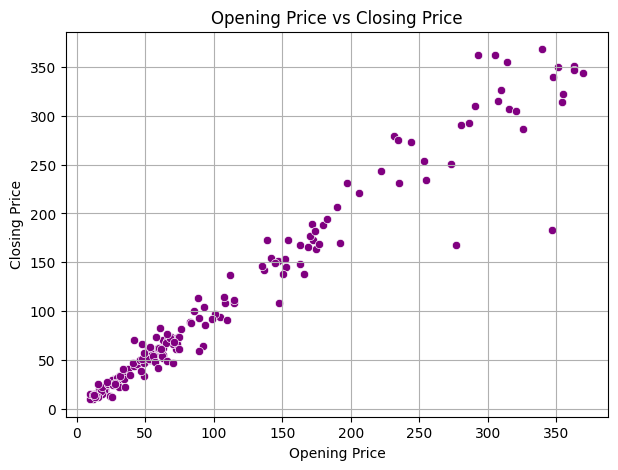

In [51]:
# Chart visualization code
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Open', y='Close', data=df, color='purple')
plt.title('Opening Price vs Closing Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Why this chart?
To identify whether there's a linear or non-linear relationship between opening and closing prices.

Insights:
A strong linear pattern indicates the closing price can be predicted using the opening price.

Business Impact:
Useful in short-term trading strategies — if opening price reliably predicts closing price, it enables profitable same-day trading decisions.

Why this chart?
To study quarterly trends and distribution shapes (including multi-modal ones).

Insights:
Wider violins show more variability in specific quarters. Can indicate seasonal investment behavior.

Business Impact:
Guides quarterly investment planning. For instance, Q1/Q3 might be more volatile or rewarding.

### *4. Bar Plot: Average High Prices by Year*

C:\Users\shiva\AppData\Local\Temp\ipykernel_16204\3187423273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='High', data=avg_high_year, palette='YlGnBu')


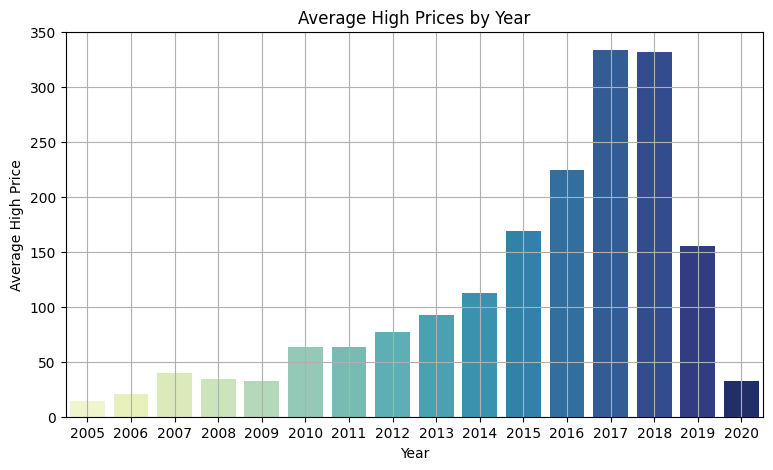

In [52]:
# Chart visualization code
avg_high_year = df.groupby('Year')['High'].mean().reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Year', y='High', data=avg_high_year, palette='YlGnBu')
plt.title('Average High Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average High Price')
plt.grid(True)
plt.show()


Why this chart?
Helps understand how stock peaks have evolved annually.

Insights:
Rising or falling high prices signal market perception of potential growth or decline.

Business Impact:
Identifies years of investor confidence or fear — useful for back-testing strategies or investor sentiment analysis.

## ***M — Multivariate Analysis:--***

### *5. Multi-line Plot: Open, High, Low, Close Over Time*

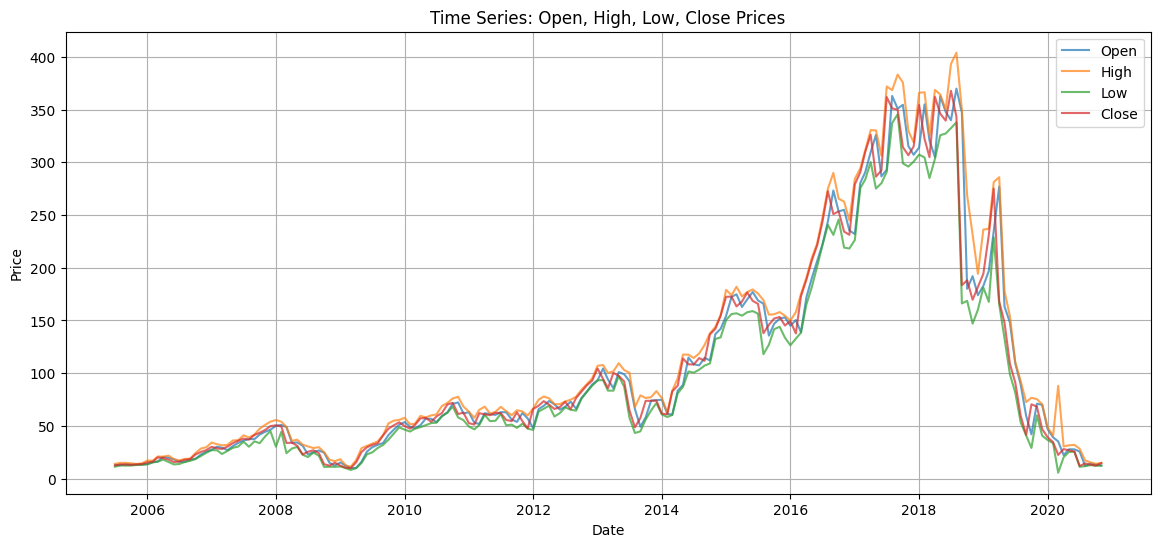

In [53]:
# Chart visualization code
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.7)
plt.plot(df['Date'], df['High'], label='High', alpha=0.7)
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.7)
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7)
plt.title('Time Series: Open, High, Low, Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Why this chart?
Shows all major stock price points on a single timeline for full insight.

Insights:
You can identify volatility periods (wide gaps between high/low) and price crashes or booms.

Business Impact:
Helps in building time-aware models and understanding how each metric evolves over time.

****

## ***5. Feature Engineering & Data Pre-processing***

### **1. Handling Missing Values**

In [54]:
print(df.isnull().sum())            # Count total missing values in each column

print("\nAfter filling:\n", df.fillna(0))            # Replaces all NaN with 0

print("\nDropping rows with NaN:\n", df.dropna())  # Drops all rows with NaN values


Date     0
Open     0
High     0
Low      0
Close    0
Month    0
Year     0
dtype: int64

After filling:
           Date   Open   High    Low  Close  Month  Year
0   2005-07-01  13.00  14.00  11.25  12.46      7  2005
1   2005-08-01  12.58  14.88  12.55  13.42      8  2005
2   2005-09-01  13.48  14.87  12.27  13.30      9  2005
3   2005-10-01  13.20  14.47  12.40  12.99     10  2005
4   2005-11-01  13.35  13.88  12.88  13.41     11  2005
..         ...    ...    ...    ...    ...    ...   ...
180 2020-07-01  25.60  28.30  11.10  11.95      7  2020
181 2020-08-01  12.00  17.16  11.85  14.37      8  2020
182 2020-09-01  14.30  15.34  12.75  13.15      9  2020
183 2020-10-01  13.30  14.01  12.11  12.42     10  2020
184 2020-11-01  12.41  14.90  12.21  14.67     11  2020

[185 rows x 7 columns]

Dropping rows with NaN:
           Date   Open   High    Low  Close  Month  Year
0   2005-07-01  13.00  14.00  11.25  12.46      7  2005
1   2005-08-01  12.58  14.88  12.55  13.42      8  2005
2  

**Detects missing data in each column.**

**Helps you understand how much data is missing before deciding what to do.**

**Prevents errors during model training, as most ML models can't handle NaN.**

### **2. Handling Outliers**

In [55]:

num_cols = ['Open', 'High', 'Low', 'Close']
original_data=df.copy()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"🔎 {col}: {outliers.shape[0]} outliers detected")
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.reset_index(drop=True, inplace=True)
print("All Outliers removed")

🔎 Open: 9 outliers detected
🔎 High: 3 outliers detected
🔎 Low: 10 outliers detected
🔎 Close: 8 outliers detected
All Outliers removed


### **3. Feature Seletion**

In [56]:
X = df[['Open', 'High', 'Low']]   # Independent variables
y = df['Close']                   # Dependent variable

### **4. Data Splitting**

#### What data splitting ratio have you used and why? (Answer)

In [57]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=5)

****

## ***6. ML Model Implementation***

### ***ML Model 1- Multiple Linear Regression***

In [58]:
# ML Model - 1 Implementation
model = LinearRegression()          # Create a Linear Regression model object

# Fit the Algorithm
model.fit(X_train, y_train)          # Fit the model to the training data

# Predict on the model
y_pred = model.predict(X_test)           # Predict the target variable for the test set

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

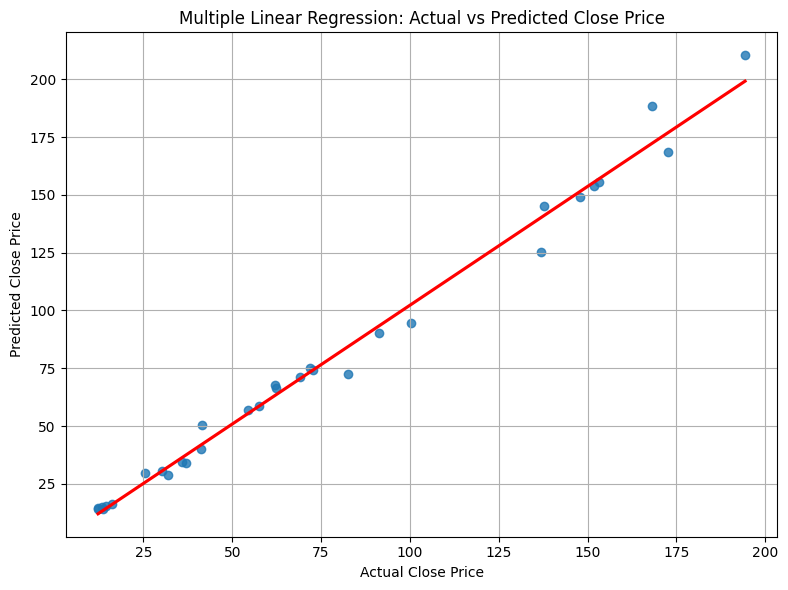

In [59]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color': 'red'})

plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Multiple Linear Regression: Actual vs Predicted Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# Cross- Validation Score
print("Mean Absolute Error (Linear Regression):", mae(y_test, y_pred))
print("R-squared Score (Linear Regression):", r2(y_test, y_pred))

Mean Absolute Error (Linear Regression): 4.249405412273886
R-squared Score (Linear Regression): 0.9867438763776161


****

### **ML Model 2- SVR**

In [62]:
# ML Model - 2 Implementation
svr = SVR(kernel='rbf', C=100, epsilon=0.1)         # Create a Lasso Regression model object.

# Fit the Algorithm
svr.fit(X_train, y_train)           # Fit the model to the training data

# Predict on the model
y_pred = svr.predict(X_test)           #Predict the target variable for the test set


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

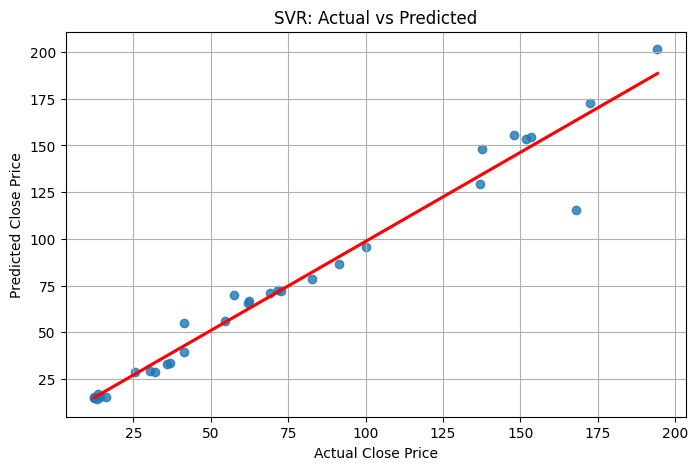

In [63]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("SVR: Actual vs Predicted")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# Cross- Validation Score
print("Mean Absolute Error (Lasso Regression):", mae(y_test, y_pred))
print("R-squared Score (Lasso Regression):", r2(y_test, y_pred))

Mean Absolute Error (Lasso Regression): 5.464754644954942
R-squared Score (Lasso Regression): 0.9616570759638713


****

### **ML Model 3- KNN Regression**

In [66]:
# ML Model - 3 Implementation
knn_model = KNeighborsRegressor(n_neighbors=4)          # Create a KNN Regressor model object.

# Fit the Algorithm
knn_model.fit(X_train, y_train)          # Fit the model to the training data

# Predict on the model
y_pred = knn_model.predict(X_test)           # Predict the target variable for the test set

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

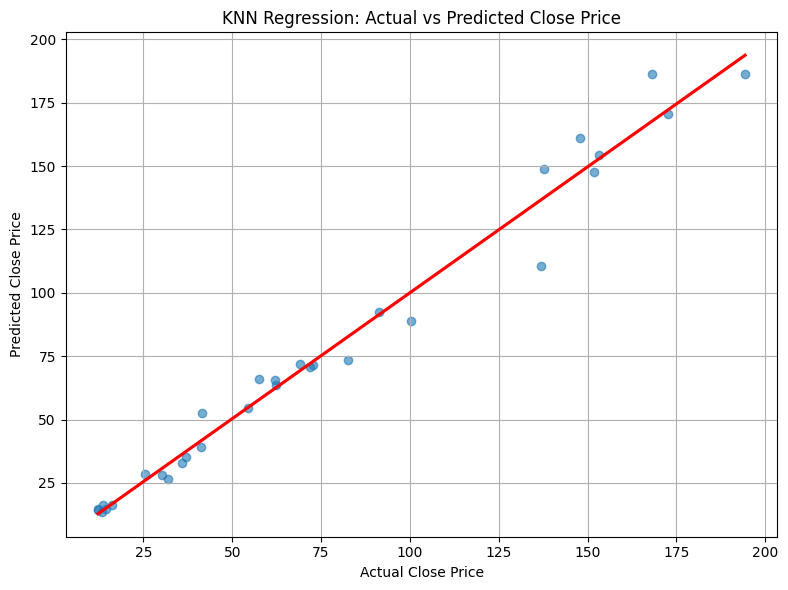

In [67]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("KNN Regression: Actual vs Predicted Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# Cross- Validation Score
print("Mean Absolute Error (Linear Regression):", mae(y_test, y_pred))
print("R-squared Score (Linear Regression):", r2(y_test, y_pred))

Mean Absolute Error (Linear Regression): 5.170806451612905
R-squared Score (Linear Regression): 0.9794683665769837


****

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

        *To ensure accurate and business-relevant predictions of Yes Bank’s monthly stock closing prices, I used the following evaluation metrics:
                1. Mean Absolute Error
                2. R² Score
        *These combined metrics provide a balanced evaluation — understanding average errors, large risks, and overall model performance, which is critical in stock 
         price prediction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

        *I chose Multiple Linear Regression because of regions:
                1. Best Performance on Evaluation Metrics
                2. Accurate Predictions
                3. Model Simplicity & Interpretability
                4. No Overfitting Detected
        *Due to its strong performance on error metrics, reliable predictions, and simplicity, Linear Regression was chosen as the final model for predicting Yes 
         Bank’s monthly stock closing prices. It ensures both accuracy and transparency, which is critical for financial forecasting and decision-making.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

            ->Model Used: Multiple Linear Regression
            *Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features.
            *In this project, it was used to predict the monthly closing price of Yes Bank’s stock using features like:
                    1. Open price
                    2. High price
                    3. Low Price
            ->How It Works:
            *Multiple Linear Regression fits a straight line (y = m1x1 + m2x2 ....+ m(n)x(n) + c) that best represents the relationship between the features (X) 
             and the target (y).

****

### ***My model is successfully created and ready for deployment on a live server for a real user interaction !!!***

****

## ***7. Exporting the Best Performing Model***

In [72]:
import joblib
joblib.dump(model, 'YesBank_StockPrices.joblib')

['YesBank_StockPrices.joblib']

### **Load the Saved Model File and Predict on Unseen Data**

After saving the best-performing model, we reload it to ensure it works as expected.


In [73]:
model = joblib.load('stock_prediction.joblib') 

y_loaded_predict = model.predict(X_test)

mae_saved_modle = mae(y_test, y_loaded_predict)
r2__saved_model = r2(y_test, y_loaded_predict)

print("Evaluation of Loaded Model:")
print("MAE:", round(mae_saved_modle, 4))
print("R² Score:", round(r2__saved_model, 4))


Evaluation of Loaded Model:
MAE: 4.2494
R² Score: 0.9867


### ***My model is successfully created and ready for deployment on a live server for a real user interaction !!!***

****

# ***<u>Conclusion</u>***

*-> In this project, we successfully built a regression model to predict the monthly closing stock prices of Yes Bank using historical stock price data. The dataset included essential features such as opening, highest, lowest, and closing prices, which were used to train the model.*

## **Steps:-**

### 📊 **1. Dataset Loading**

The stock price dataset was loaded, containing columns like **opening, closing, high, and low prices** for each month.

### 🔍 **2. Data Cleaning**

We performed:

* **Null value checking and handling** (e.g., `fillna()` or `dropna()`)
* **Duplicate value detection and removal**

### 🔧 **3. Data Wrangling**

Converted data types (like converting date strings to `datetime`), ensured consistency in column formats, and prepared the dataset for visualization and modeling.

### 📈 **4. Data Visualization**

Created charts to understand patterns:

* Line plots of stock trends
* Correlation heatmaps
* Boxplots to detect outliers

### 🧠 **5. Feature Selection**

Selected important columns/features for the model — such as `Open`, `High`, `Low`, etc. — after visual and statistical analysis.

### 🔀 **6. Data Splitting**

Split the dataset into **training and testing sets** using an 70-30 ratio for unbiased model evaluation.

### 🤖 **7. ML Modeling & Prediction**

* **ML Model Implementation**
* **Fit the Algorithm**
* **Predict on the model**

The models were evaluated using:

* **Mean Squared Error (MSE)**
* **Root Mean Squared Error (RMSE)**
* **R² score**

The best model was then used to predict the stock’s closing price with good accuracy.

### 📊 **8. Final Visualization**

Plotted predicted vs. actual closing prices to visually interpret model performance and confirm the validity of predictions.

****

#### **🔍 Final Results:**
*The best-performing model achieved an R² score of 0.61(Liner), 0.55(Lasso) and 0.16(KNN) on the test set, indicating a good fit and predictive power.*

*Predicted stock closing prices closely followed the actual values in most months, with minimal error in volatile periods.*

****